<a href="https://colab.research.google.com/github/ADiti16Sengar/DL-CHE/blob/main/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [61]:
data = pd.read_csv('Adsorption_Data.csv')

X = data.drop('Adorption Capacity(output)', axis=1)
y = data['Adorption Capacity(output)']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [63]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [64]:
X_train

array([[ 0.8743226 ,  0.61048135, -0.12587417, -1.02760475, -0.05307541],
       [-1.53647626, -1.03537253, -0.44318199,  0.20356227, -0.61802952],
       [-1.67753364, -1.2147284 , -1.2508746 , -0.39663165, -0.77632891],
       [ 0.91599865,  1.56001243,  0.3068183 , -0.33287478, -0.45003985],
       [ 0.8807343 , -0.33904974, -0.35664349, -1.02760475,  0.45575742],
       [-0.00728602,  0.39947444, -0.270105  , -1.04739136, -0.64784862],
       [ 0.55373765,  2.0875297 ,  1.05681859,  0.8037562 , -0.77516907],
       [-1.47556512, -0.59225802, -0.270105  ,  0.52014808, -0.75739733],
       [ 0.83264656,  1.66551588, -0.47202815, -0.36585247,  0.49691302],
       [ 0.83264656,  1.03249516, -0.8470283 , -0.11961907, -0.77255008],
       [ 0.90958695, -0.33904974, -0.41433582,  0.12221731,  1.1404369 ],
       [ 0.32932818,  0.05131304,  1.11451092, -1.01441367, -0.37483735],
       [-0.30863588,  0.91644136,  0.24912597,  0.02768127,  1.86253055],
       [ 0.67876578,  0.29397099, -1.3

In [65]:
X_train.shape[1]

5

In [66]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [67]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [68]:
# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10000000, batch_size=2, callbacks=[early_stop])

Epoch 1/10000000
11/11 [==============================] - 1s 16ms/step - loss: 60.1173 - val_loss: 65.5932
Epoch 2/10000000
11/11 [==============================] - 0s 5ms/step - loss: 58.7857 - val_loss: 63.7220
Epoch 3/10000000
11/11 [==============================] - 0s 4ms/step - loss: 57.0293 - val_loss: 62.4731
Epoch 4/10000000
11/11 [==============================] - 0s 6ms/step - loss: 55.6546 - val_loss: 61.4168
Epoch 5/10000000
11/11 [==============================] - 0s 6ms/step - loss: 54.6515 - val_loss: 60.2466
Epoch 6/10000000
11/11 [==============================] - 0s 5ms/step - loss: 53.2419 - val_loss: 59.1393
Epoch 7/10000000
11/11 [==============================] - 0s 6ms/step - loss: 51.7305 - val_loss: 57.8131
Epoch 8/10000000
11/11 [==============================] - 0s 7ms/step - loss: 50.9733 - val_loss: 56.2655
Epoch 9/10000000
11/11 [==============================] - 0s 5ms/step - loss: 49.2544 - val_loss: 54.7017
Epoch 10/10000000
11/11 [====================

In [69]:
test_loss = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 158ms/step - loss: 11.0310


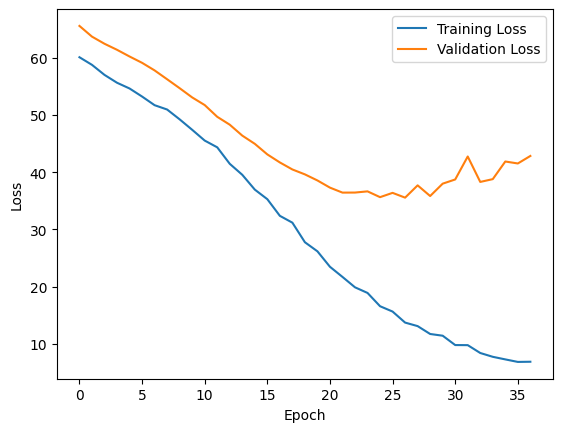

In [70]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [74]:
print(len(model.layers))

# Get the weights of the first layer
layer_weights = model.layers[0].get_weights()
print(layer_weights[0].shape)

# Check the shape of X_train
print(X_train.shape)

3
(5, 64)
(22, 5)


In [76]:
neurons = [8, 16, 32, 64, 128]
learning_rates = [0.001, 0.01, 0.1, 1]
results = []
for n in neurons:
    for lr in learning_rates:
        model = Sequential()
        model.add(Dense(n, activation='relu', input_dim=X_train.shape[1]))
        model.add(Dense(1))
        model.compile(loss='mean_squared_error', optimizer='adam')
        history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=16, callbacks=[early_stop])
        test_loss = model.evaluate(X_test, y_test)
        results.append({'neurons': n, 'lr': lr, 'test_loss': test_loss})

Epoch 1/100
2/2 [==============================] - 2s 143ms/step - loss: 52.3175 - val_loss: 57.3153
Epoch 2/100
2/2 [==============================] - 0s 31ms/step - loss: 52.2501 - val_loss: 57.2031
Epoch 3/100
2/2 [==============================] - 0s 32ms/step - loss: 52.1196 - val_loss: 57.1066
Epoch 4/100
2/2 [==============================] - 0s 35ms/step - loss: 52.0583 - val_loss: 57.0030
Epoch 5/100
2/2 [==============================] - 0s 37ms/step - loss: 51.9604 - val_loss: 56.9021
Epoch 6/100
2/2 [==============================] - 0s 35ms/step - loss: 51.8745 - val_loss: 56.8014
Epoch 7/100
2/2 [==============================] - 0s 31ms/step - loss: 51.7810 - val_loss: 56.7036
Epoch 8/100
2/2 [==============================] - 0s 31ms/step - loss: 51.6958 - val_loss: 56.6063
Epoch 9/100
2/2 [==============================] - 0s 31ms/step - loss: 51.6086 - val_loss: 56.5134
Epoch 10/100
2/2 [==============================] - 0s 30ms/step - loss: 51.4962 - val_loss: 56.421

Text(0, 0.5, 'Test Loss')

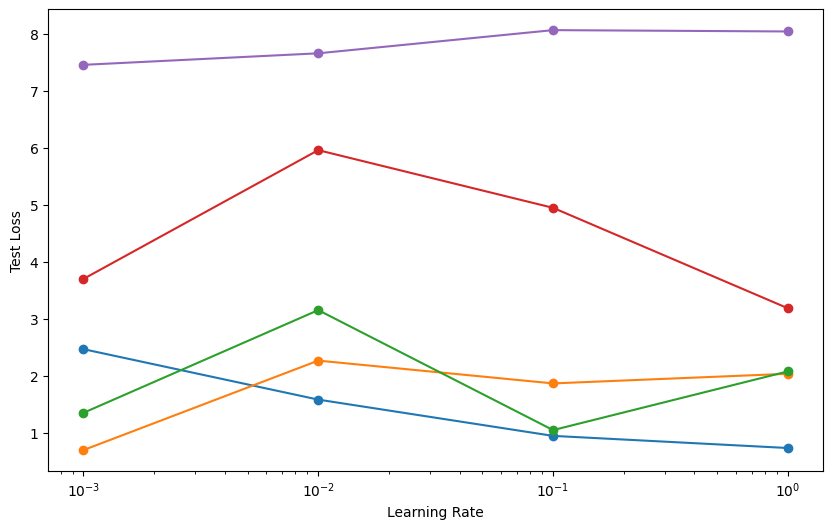

In [78]:
results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 6))
for n in neurons:
    df = results_df[results_df['neurons'] == n]
    plt.plot(df['lr'], df['test_loss'], '-o', label=f'{n} neurons')
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Test Loss')

In [8]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 23.5190 - accuracy: 0.0000e+00 - val_loss: 202.3101 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 71ms/step - loss: 23.4700 - accuracy: 0.0000e+00 - val_loss: 202.1859 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 49ms/step - loss: 23.4211 - accuracy: 0.0000e+00 - val_loss: 202.0613 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 64ms/step - loss: 23.3723 - accuracy: 0.0000e+00 - val_loss: 201.9364 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 46ms/step - loss: 23.3237 - accuracy: 0.0000e+00 - val_loss: 201.8114 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 53ms/step - loss: 23.2752 - accuracy: 0.0000e+00 - val_loss: 201.6862 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 73ms/step - loss: 23.2268 - accuracy: 0.00

In [9]:
from sklearn.metrics import mean_squared_error

# evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE: ', mse)

1/1 [==============================] - 0s 86ms/step
MSE:  3.3531971660685342


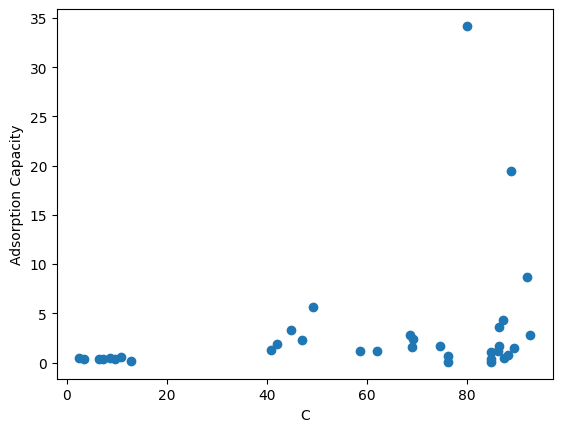

In [10]:
C = data['C(x1)']

# plot C vs adsorption capacity
plt.scatter(C, y)
plt.xlabel('C')
plt.ylabel('Adsorption Capacity')
plt.show()

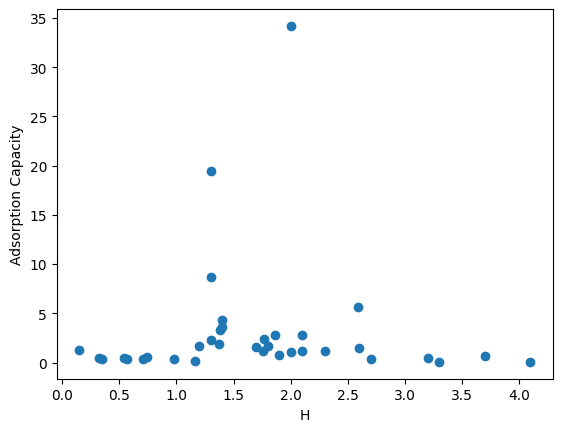

In [11]:
H = data['H(x2)']

# plot surface area vs adsorption capacity
plt.scatter(H, y)
plt.xlabel('H')
plt.ylabel('Adsorption Capacity')
plt.show()

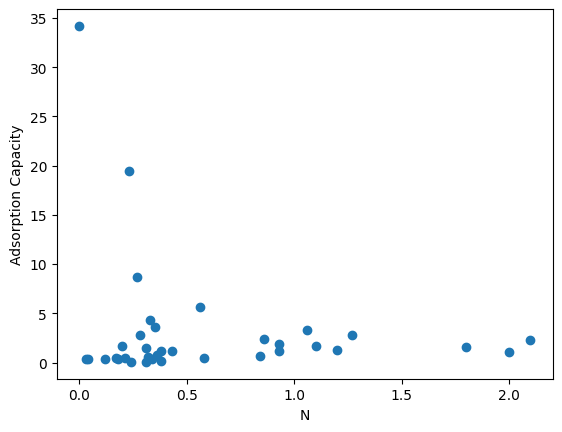

In [12]:
N = data['N(x3)']


# plot surface area vs adsorption capacity
plt.scatter(N, y)
plt.xlabel('N')
plt.ylabel('Adsorption Capacity')
plt.show()

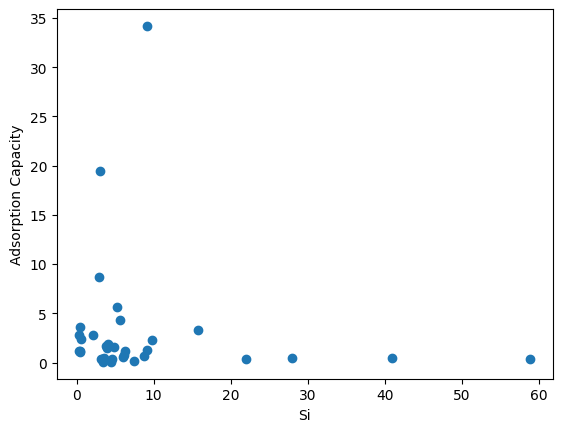

In [13]:
Si = data['Si(x4)']


# plot surface area vs adsorption capacity
plt.scatter(Si, y)
plt.xlabel('Si')
plt.ylabel('Adsorption Capacity')
plt.show()

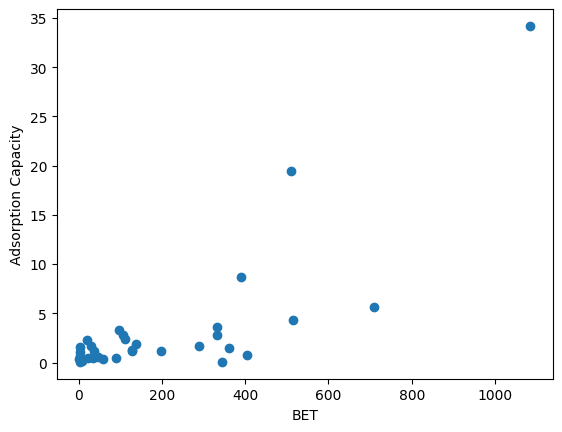

In [14]:

BET = data['BET(x5)']

# plot surface area vs adsorption capacity
plt.scatter(BET, y)
plt.xlabel('BET')
plt.ylabel('Adsorption Capacity')
plt.show()